In [1]:
import pickle
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import csv

import cv2


# Load Camera calibration params
X_train, y_train, X_valid, y_valid, X_test, y_test = pickle.load(open( "pickle_data/base_data.p", "rb" ) )
globalData = pickle.load(open( "pickle_data/gData.p", "rb" ) )

## Step 2: Pre-process the Data Set (normalization, grayscale, etc.)

### Shuffle data

In [2]:
X_train, y_train = shuffle(X_train, y_train)

### HIstogram color equilibration 

In [3]:
def hisEqulColor(img):
    ycrcb=cv2.cvtColor(img,cv2.COLOR_RGB2YCR_CB)
    channels=cv2.split(ycrcb)
    cv2.equalizeHist(channels[0],channels[0])
    cv2.merge(channels,ycrcb)
    cv2.cvtColor(ycrcb,cv2.COLOR_YCR_CB2RGB,img)
    return img

### Contrast correction

In [4]:
def cv2contrast_normalize(x_in):
    dst = np.zeros(x_in.shape) # setup destination matrix shape
    
    # Use list comprehension, adjust each image contrast to be between [0, 255]
    l = [cv2.normalize(x, dst, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U) for x in x_in]
    
    return np.asarray(l)

### Color enhancement preview

Image enhancement:


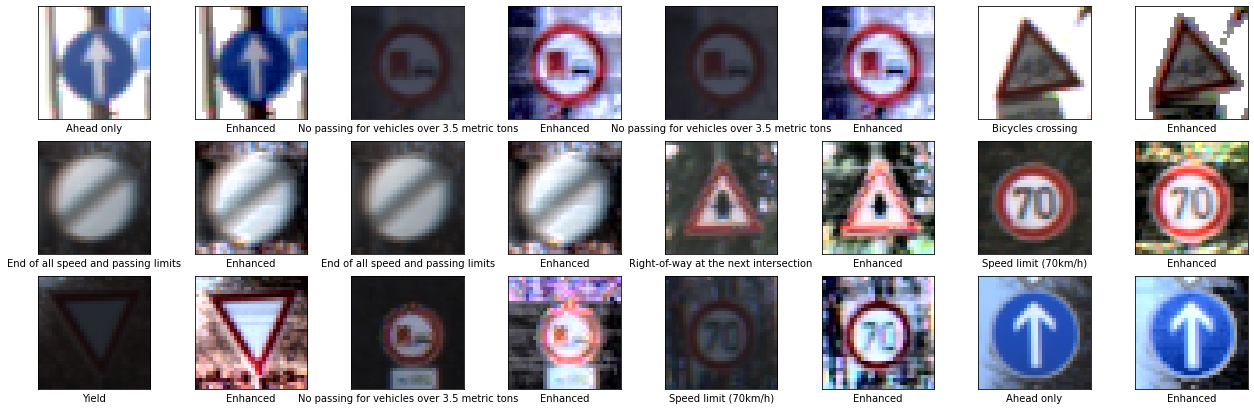

In [5]:
plt.figure(figsize=(22, 12))

signnames = [row[1] for row in csv.reader(open("signnames.csv"))][1:]

for i in range(0,24,2):
    n = np.random.randint(globalData['n_clasees'])
    
    ## Original
    plt.subplot(5, 8, 1+i)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(X_train[n], interpolation='nearest')
    plt.xlabel(signnames[y_train[n]])
    
    ## Mod
    plt.subplot(5, 8, 2+i)
    plt.yticks([])
    plt.xticks([])

    plt.xlabel(signnames[y_train[n]])
    plt.imshow(hisEqulColor(cv2contrast_normalize(X_train[n])), interpolation='nearest')
    plt.xlabel('Enhanced')
    
print("Image enhancement:")

# Helper to adapt images to full width
plt.show()

In [6]:
X_train =  np.array([hisEqulColor(cv2contrast_normalize(xi)) for xi in X_train])
X_valid = np.array([hisEqulColor(cv2contrast_normalize(xi)) for xi in X_valid])
X_test = np.array([hisEqulColor(cv2contrast_normalize(xi)) for xi in X_test])

### Normalize images [-1, 1]

The data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

In [7]:
X_train = np.divide(np.add(X_train, -128),128)
X_test = np.divide(np.add(X_test, -128),128)
X_valid = np.divide(np.add(X_valid, -128),128)

In [8]:
pickle.dump( [X_train, y_train, X_valid, y_valid, X_test, y_test], open( "pickle_data/prep_data.p", "wb" ) )